In [1]:
from test_data import generate_test
import datetime
from time import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
n = 100
p = 32

gamma = 0.05
p_frac = 0.3
p_quant = 0.3
r = 20
# out_type = 'point'

os.makedirs("./images/", exist_ok=True)

timestamp = datetime.datetime.fromtimestamp(time())
timestamp = timestamp.strftime('%Y-%m-%d_%H-%M-%S')
print(timestamp)

2022-08-05_10-52-55


In [3]:

def plot_data(timestamp):
    # matrix plots
    pca = PCA(2, svd_solver='full')
    pca_lst = []
    out_lst = []
    plt.figure(figsize=(3*2+1.5,2+1.5))
    for i in range(6):
        fig = plt.subplot(1,6,i+1)
        X, outs = generate_test(n,p,r, p_frac, p_quant,gamma, noise=0.1, ta=i+1)
        plt.imshow(X)
        # plt.title('noise = {}'.format(np.round(i/5, 1)) )
        for out in outs:
            fig.text(-5,out+2, 'o-', color='r')
        plt.title('D{}'.format(i+1))
        #pca plots
        fig.set_xticks([])
        fig.set_yticks([])
        X_pca = pca.fit_transform(X)
        pca_lst.append(X_pca)
        out_lst.append(outs)
    fname = '{}_data_plot_n{}_p{}_r{}_g{}_pf{}_pq{}.png'.format(timestamp,n,p,r,gamma,p_frac,p_quant)
    plt.savefig('./images/'+fname, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.figure(figsize=(3*3+2,2*2.5+1))
    for i in range(6):
        fig = plt.subplot(2,3,i+1)
        fig.set_xticks([])
        fig.set_yticks([])
        X_pca = pca_lst[i]
        outs = out_lst[i]
        plt.plot(X_pca[:,0], X_pca[:,1], 'b.')
        plt.title('D{}'.format(i+1))

        for out in outs:
            # print(out)
            plt.plot(X_pca[out, 0], X_pca[out,1], 'rx')
    fname = '{}_data_pca_plot_n{}_p{}_r{}_g{}_pf{}_pq{}.png'.format(timestamp, n,p,r,gamma,p_frac,p_quant)

    plt.savefig('./images/'+fname, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    
def plot_data_noise(timestamp):
    # matrix plots
    pca = PCA(2, svd_solver='full')
    pca_lst = []
    out_lst = []
#     plt.figure(figsize=(3*2+1.5,2+1.5))
    plt.figure(figsize=())
    for i in range(6):
        fig = plt.subplot(1,6,i+1)
        X, outs = generate_test(n,p,r, p_frac, p_quant,gamma, noise=i/5, ta=1)
        plt.imshow(X)
        plt.title('$\sigma$={}'.format(round(i/5, 1)) )
        for out in outs:
            fig.text(-5,out+1, 'o-', color='r')

        #pca plots
        fig.set_xticks([])
        fig.set_yticks([])
        X_pca = pca.fit_transform(X)
        pca_lst.append(X_pca)
        out_lst.append(outs)
    fname = '{}_data_noise_plot_n{}_p{}_r{}_g{}_pf{}_pq{}.png'.format(timestamp,n,p,r,gamma,p_frac,p_quant)
    plt.savefig('./images/'+fname, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.figure(figsize=(3*3+2,2*2.5+1))
    for i in range(6):
        fig = plt.subplot(2,3,i+1)
        fig.set_xticks([])
        fig.set_yticks([])
        X_pca = pca_lst[i]
        outs = out_lst[i]
        plt.plot(X_pca[:,0], X_pca[:,1], 'b.')
        plt.title('noise {}'.format(i))
        for out in outs:
            # print(out)
            plt.plot(X_pca[out, 0], X_pca[out,1], 'rx')
    fname = '{}_data_noise_pca_plot_n{}_p{}_r{}_g{}_pf{}_pq{}.png'.format(timestamp, n,p,r,gamma,p_frac,p_quant)

    plt.savefig('./images/'+fname, bbox_inches='tight', pad_inches=0.1)
    plt.show()

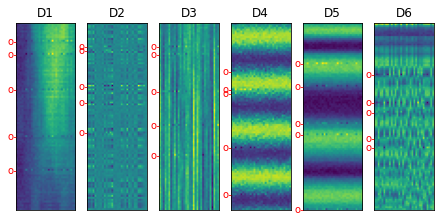

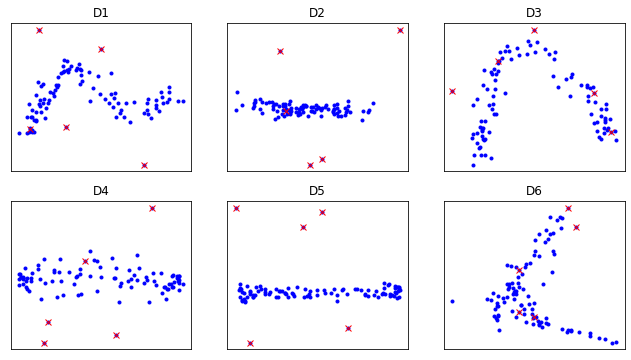

In [4]:
plot_data(timestamp)

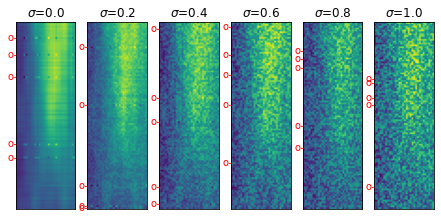

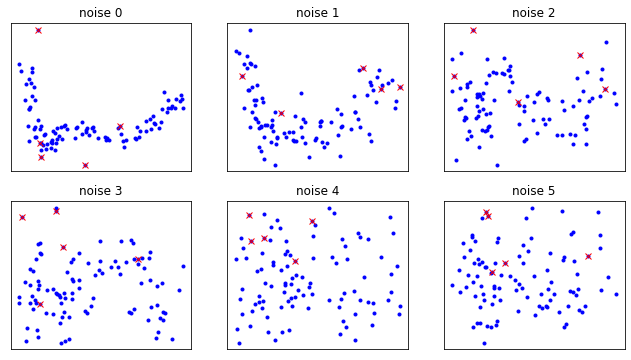

In [5]:
plot_data_noise(timestamp)